# AdaBoostClassifier

* This model is based on an AdaBoostClassifier with a Decision Tree as a base estimator with a max depth of 2.  
* The number of weak learners is 4.

In [7]:
import pandas as pd
import numpy as np
# Import supplementary visualization code visuals.py
import visuals as vs
from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler

data = pd.read_csv('titanic_data.csv')

# Pretty display for notebooks
%matplotlib inline

# ---  Pre-processing ---

# Removing insignificant data
data = data.drop(columns=['Ticket', 'Name', 'Cabin', 'PassengerId'])

passengerId = 
# Removing NaN values
data = data.fillna(0)

# Extracting features
features_raw = data.drop(columns = 'Survived')

# Extracting Survived status
survived_data = data['Survived']

# Log-transform the skewed features
skewed = ['Fare']
features_log_transformed = pd.DataFrame(data = features_raw)
features_log_transformed[skewed] = data[skewed].apply(lambda x: np.log(x + 1))

# Min Max Scaler (Normalization)
scaler = MinMaxScaler()
features_log_transformed.head(20)
numerical = ['Age', 'Fare']
features_log_minmax_transform = pd.DataFrame(data = features_log_transformed)
features_log_minmax_transform[numerical] = scaler.fit_transform(features_log_minmax_transform[numerical])

# Replacing: Male = 0 and Female = 1
gender = {"male": 0, "female": 1}
features_log_minmax_transform = features_log_minmax_transform.replace({"Sex":gender})

# One-hot encode the 'features_log_minmax_transform' data using pandas.get_dummies()
features_final = pd.get_dummies(features_log_minmax_transform)

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = \
train_test_split(features_final, survived_data, random_state=30, test_size=0.2 )

from sklearn.model_selection import ShuffleSplit
cv_sets = ShuffleSplit(n_splits = 10, test_size = 0.2, random_state = 30)

In [9]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

clf = AdaBoostClassifier(base_estimator = DecisionTreeClassifier(max_depth=2, min_samples_leaf = 5))

In [10]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, accuracy_score

parameters = {'algorithm':['SAMME', 'SAMME.R'] ,\
              'n_estimators':[5, 25, 50, 100],\
              'learning_rate':[0.25, 0.5, 0.75, 1]}
scorer = make_scorer(accuracy_score)

grid_obj = GridSearchCV(clf, parameters, scoring = scorer, cv = cv_sets)

grid_fit = grid_obj.fit(X_train, y_train)

best_clf = grid_fit.best_estimator_

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
          learning_rate=0.25, n_estimators=100, random_state=None)


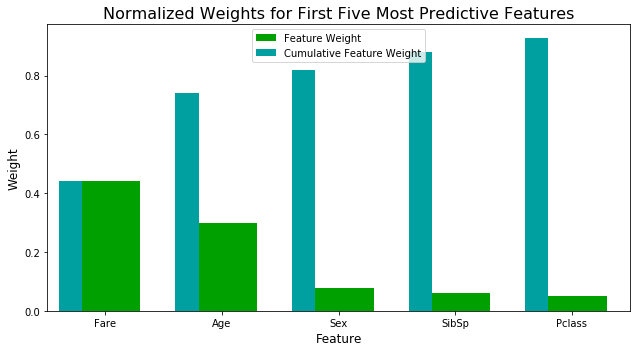

In [11]:
y_pred_train = best_clf.predict(X_train)
y_pred_test = best_clf.predict(X_test)

print(best_clf)

importances = best_clf.feature_importances_

# Plot
vs.feature_plot(importances, X_train, y_train)

In [12]:
from sklearn.metrics import accuracy_score

acc_train = accuracy_score(y_train, y_pred_train)
acc_test = accuracy_score(y_test, y_pred_test)

print("Accuracy training score: {}".format(acc_train))
print("Accuracy testing score: {}".format(acc_test))

Accuracy training score: 0.8974719101123596
Accuracy testing score: 0.8156424581005587
